## Observations and Insights 

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [87]:
# Checking the number of mice.
num_of_mice = mouse_data['Mouse ID'].count()
num_of_mice

1893

In [88]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mice = mouse_data[['Mouse ID','Timepoint']]
duplicated_mice = duplicated_mice[duplicated_mice.duplicated()]
duplicated_mice

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [89]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_data.loc[mouse_data["Mouse ID"] == "g989",:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [90]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data.drop_duplicates(
  subset = ['Mouse ID', 'Timepoint'],
  keep = 'last').reset_index(drop = True)

In [91]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].count()

1888

## Summary Statistics

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

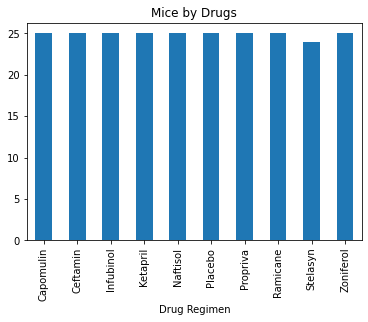

In [115]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_regimen = mouse_data.drop_duplicates(
  subset = ['Mouse ID', 'Drug Regimen'],
  keep = 'last').reset_index(drop = True)
mice_regimen = mice_regimen[['Mouse ID','Drug Regimen']]
mice_regimen = mice_regimen.groupby(['Drug Regimen'])
drug_regimen = mice_regimen['Drug Regimen'].count()
drug_chart = drug_regimen.plot(kind='bar',title ='Mice by Drugs')

In [119]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.


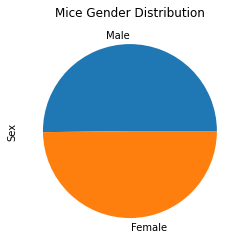

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = mouse_data[['Mouse ID','Sex']].drop_duplicates()
mice_gender = mice_sex['Sex'].value_counts()
mice_gender_df = pd.DataFrame({"Sex":mice_gender})

mice_pie = mice_gender.plot(kind="pie", y="Sex", title ="Mice Gender Distribution")

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
